5339


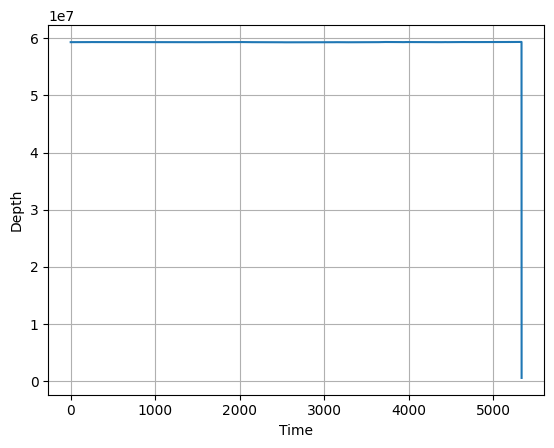

In [ ]:
import matplotlib.pyplot as plt
with open("putty.log", "r") as file:
    lines = file.readlines()
    
print(len(lines))
lines_float = [float(line) for line in lines[2:-2]]

plt.plot(range(len(lines_float)), lines_float)
plt.xlabel('Time')
plt.ylabel('Depth')
# plt.title('Smoke vs Samples')
plt.grid(True)
plt.show()